In [4]:
from fastai.vision.all import *
from matplotlib import pyplot as plt
import cv2

In [9]:
path = "./images"
files = get_image_files(path)
len(files)

6105

In [10]:
def label_func(f):
    return f[0]

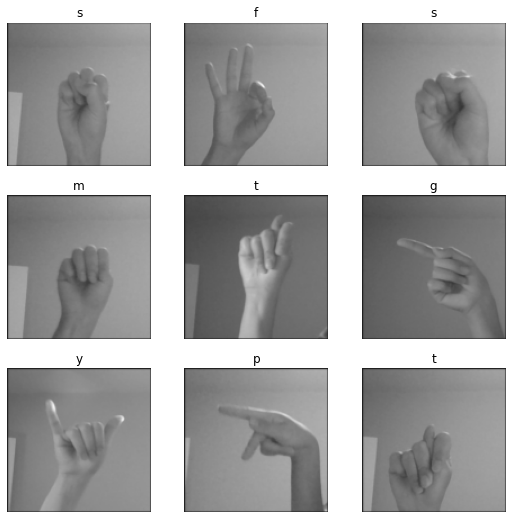

In [14]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(128))
dls.show_batch()

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.004365158267319202)

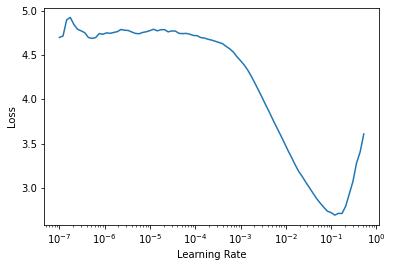

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [16]:
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.685487,0.109569,0.031941,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.205486,0.155248,0.040131,00:21
1,0.054212,0.003967,0.001638,00:21


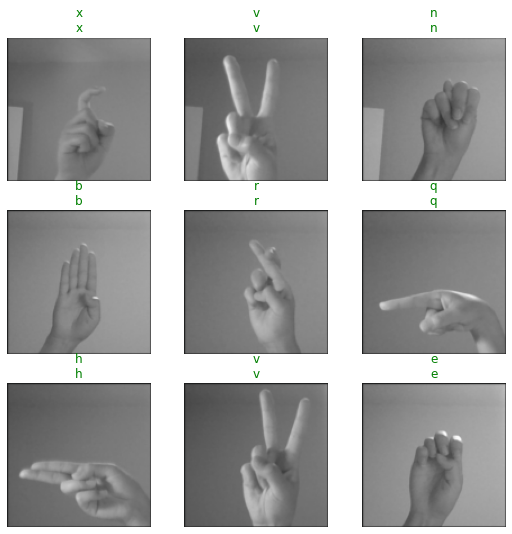

In [17]:
learn.show_results()

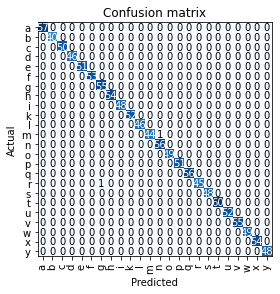

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

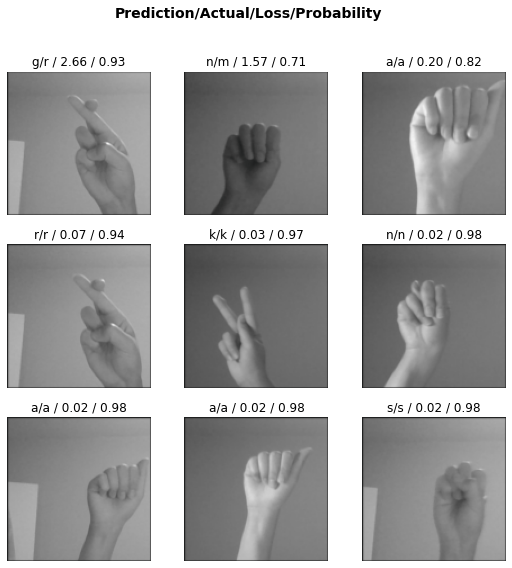

In [20]:
interp.plot_top_losses(9)

In [23]:
learn.export(fname='/notebooks/storage/asl/models/model_128.pkl')

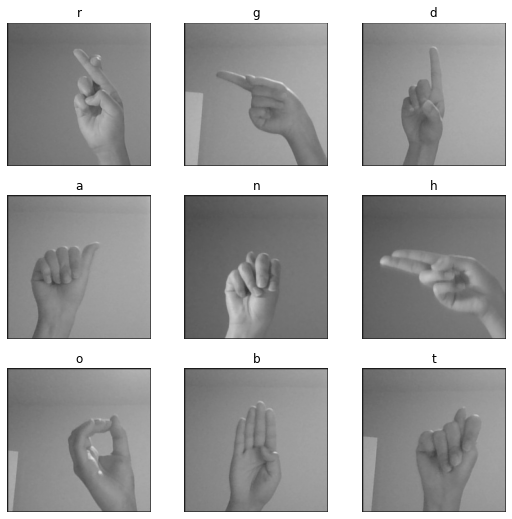

In [24]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.005248074419796467)

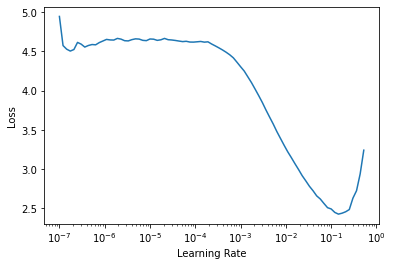

In [25]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [27]:
learn.fine_tune(2, 5e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.326264,0.044154,0.018837,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.079486,0.043450,0.014742,00:57
1,0.027053,0.001984,0.000819,00:56


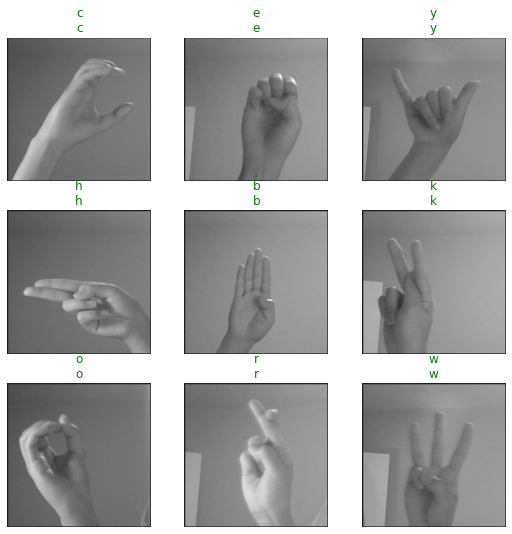

In [28]:
learn.show_results()

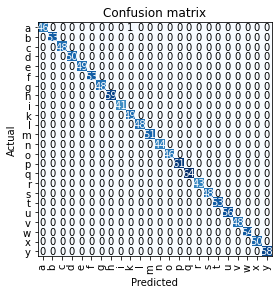

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

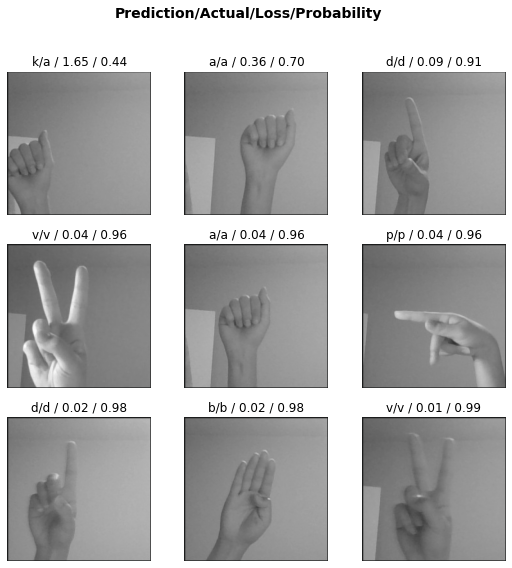

In [30]:
interp.plot_top_losses(9)

In [31]:
learn.export(fname='/notebooks/storage/asl/models/model_224.pkl')

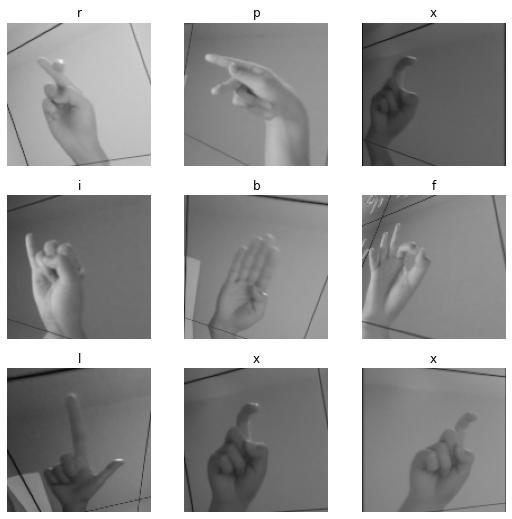

In [34]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(128), 
                                      batch_tfms=aug_transforms(mult=2, do_flip=False, flip_vert=False, max_rotate=10.0))
dls.show_batch()

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.007585775572806597)

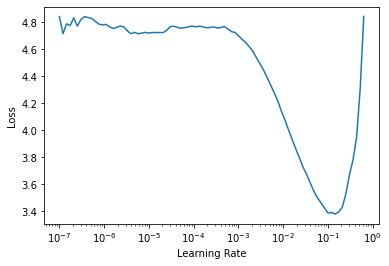

In [35]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [ ]:
learn.fine_tune(2, 7e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.906834,0.344899,0.118755,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.371455,0.033302,0.012285,00:22
